# Car Price Prediction

# Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sm
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector,ExhaustiveFeatureSelector
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import Ridge,Lasso,ElasticNet,SGDRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# Reading the required dataset:

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Check the shape of dataset:

In [4]:
print('Total number of Rows:',int(df.size/(len(df.columns))))

Total number of Rows: 205


In [5]:
print('Total number of Columns:',int(len(df.columns)))

Total number of Columns: 26


# Basic Idea of Data-types:

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Basic Statistics measures:

In [7]:
print('Basic Measure for Numeric Data:')
df.describe()

Basic Measure for Numeric Data:


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
print('Basic Measures for Catogerical Data:')
df.describe(include ='object')

Basic Measures for Catogerical Data:


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


# Data Cleaning and Preparation

# Splitting company name from CarName column

In [9]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
print('The total number of campanies in the dataset',df['CompanyName'].nunique())

The total number of campanies in the dataset 28


In [11]:
print('Companies names are:',df['CompanyName'].unique())

Companies names are: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [12]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Checking for duplicates

In [13]:
df[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [14]:
print('Show the Variable names :')
print()
print(df.columns)

Show the Variable names :

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


# Skewness and Kurtosis

In [15]:
print('Skewness:')
print(df.skew())

Skewness:
car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64


In [16]:
print('Kurtosis:')
print(df.kurt())

Kurtosis:
car_ID             -1.200000
symboling          -0.676271
wheelbase           1.017039
carlength          -0.082895
carwidth            0.702764
carheight          -0.443812
curbweight         -0.042854
enginesize          5.305682
boreratio          -0.785042
stroke              2.174396
compressionratio    5.233054
horsepower          2.684006
peakrpm             0.086756
citympg             0.578648
highwaympg          0.440070
price               3.051648
dtype: float64


# Analysising the data using Visualization methods:

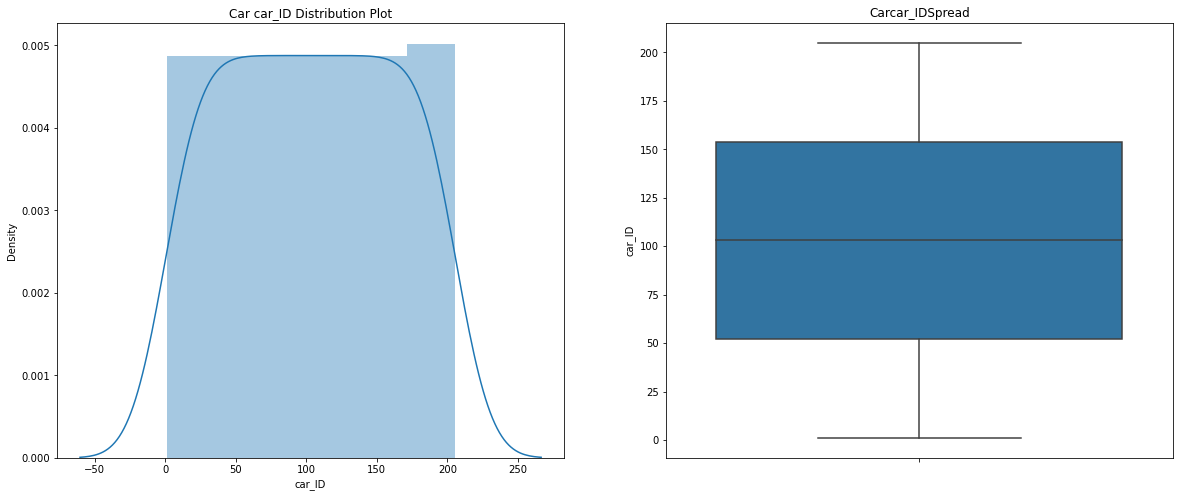

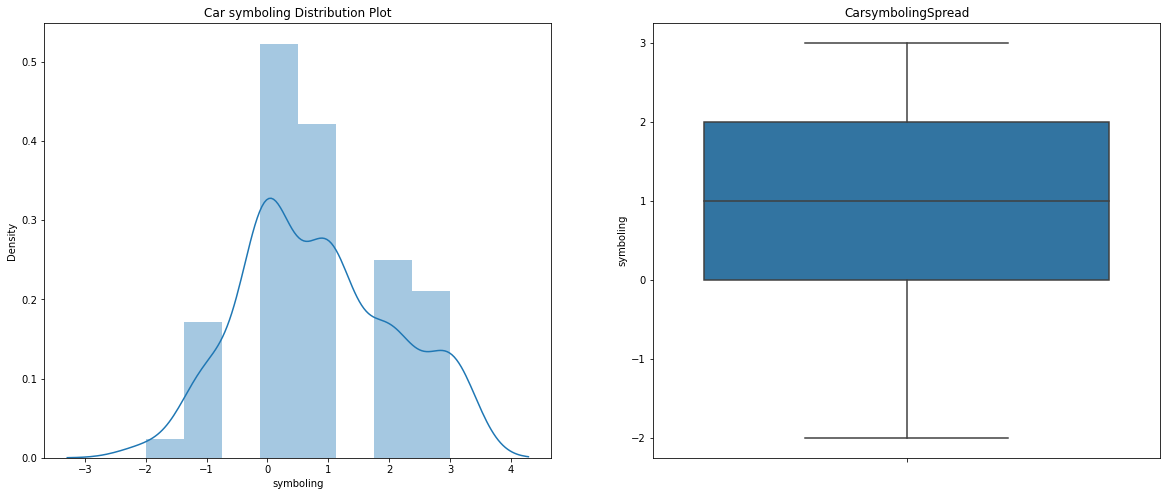

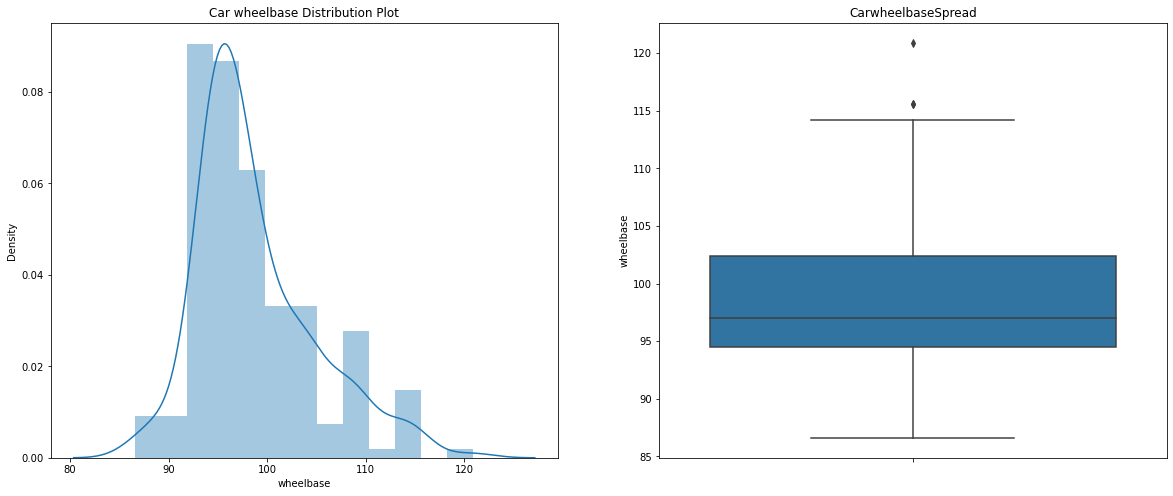

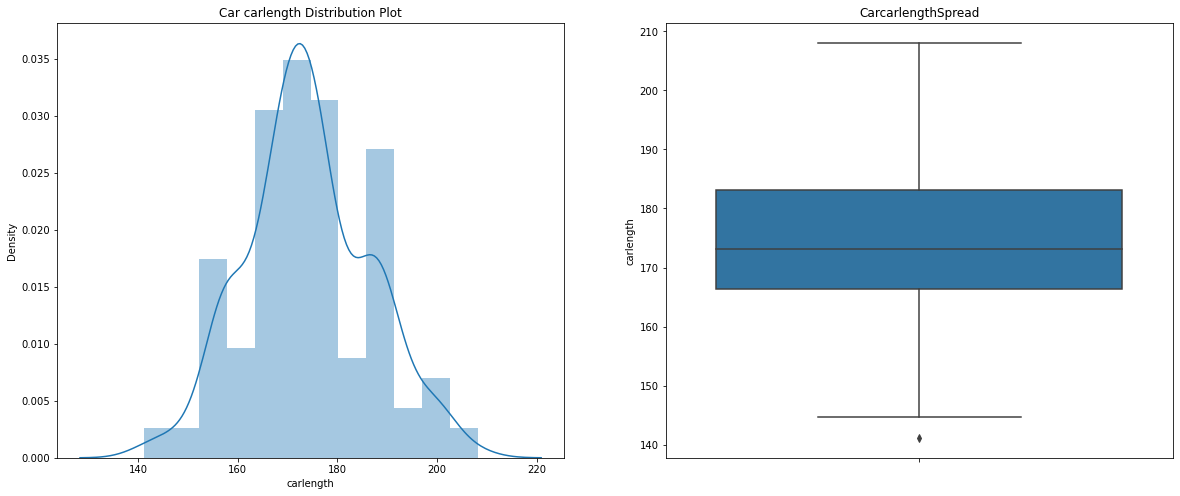

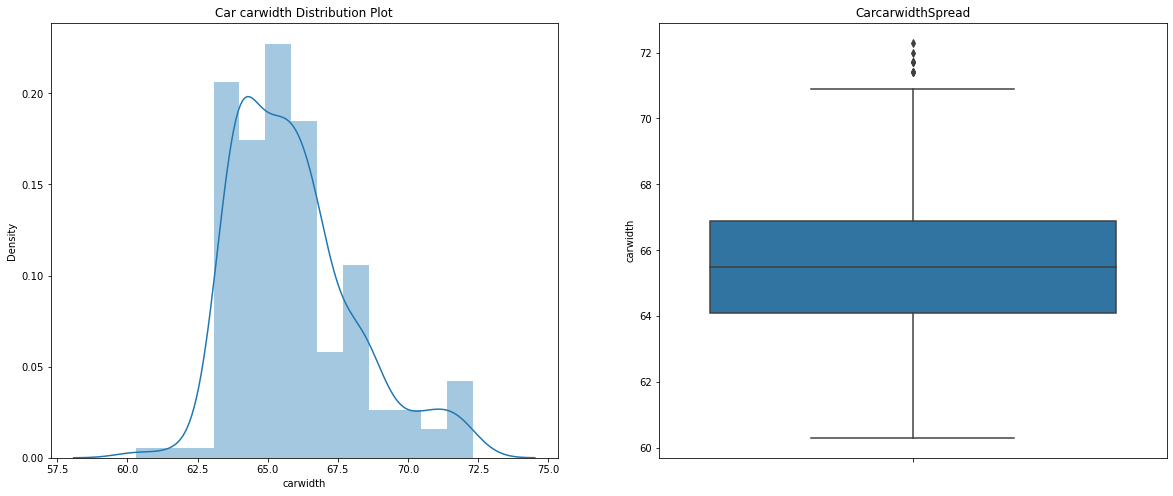

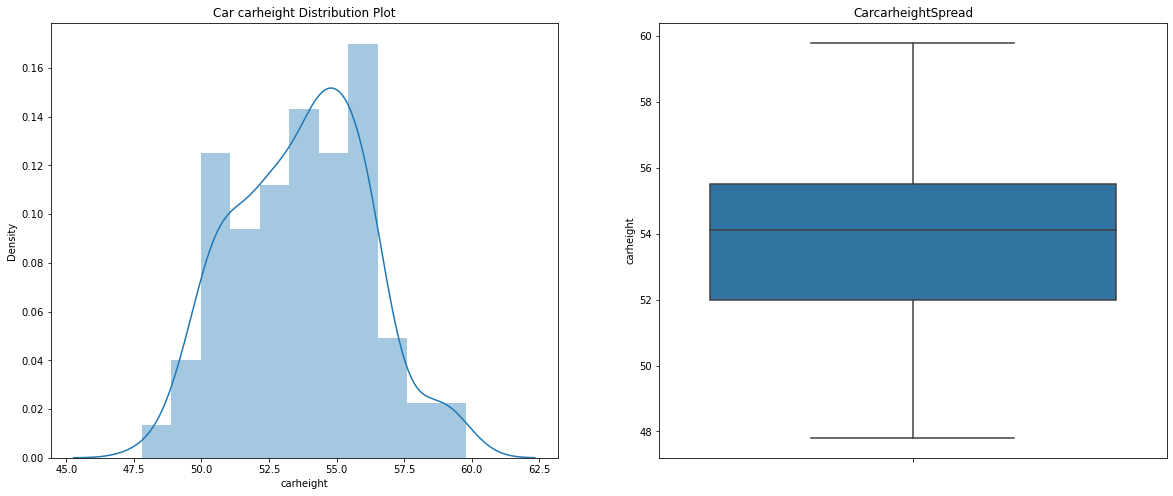

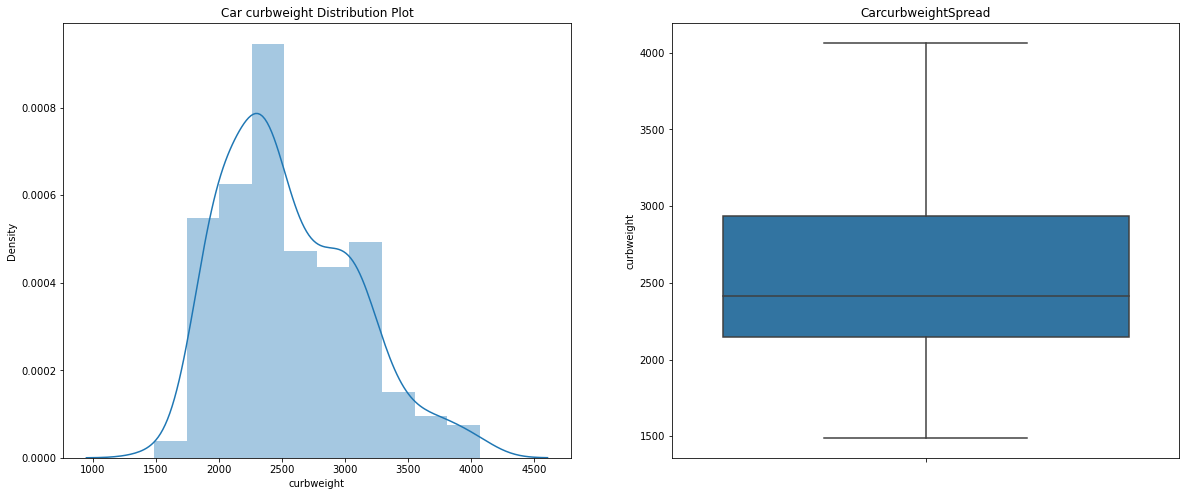

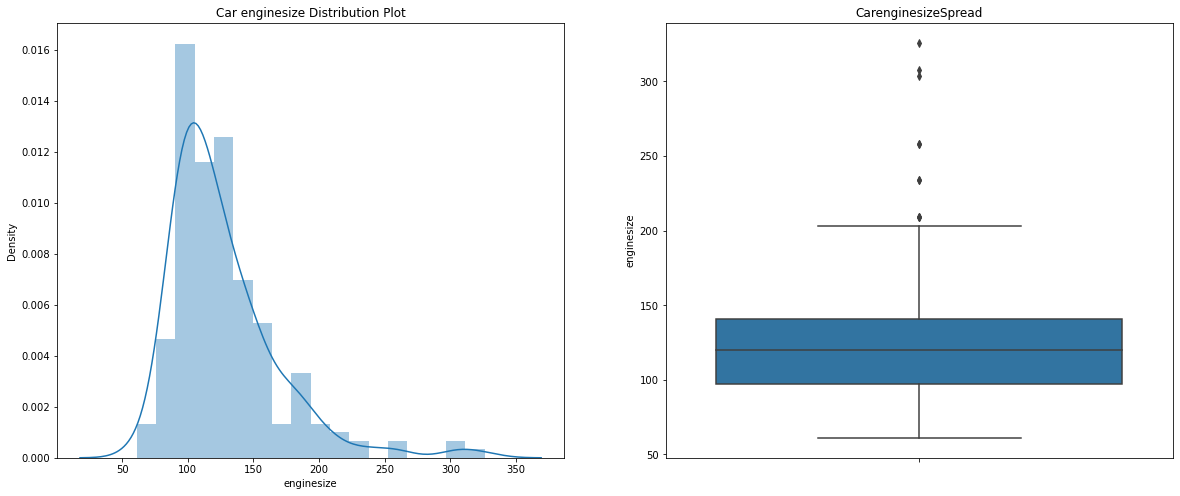

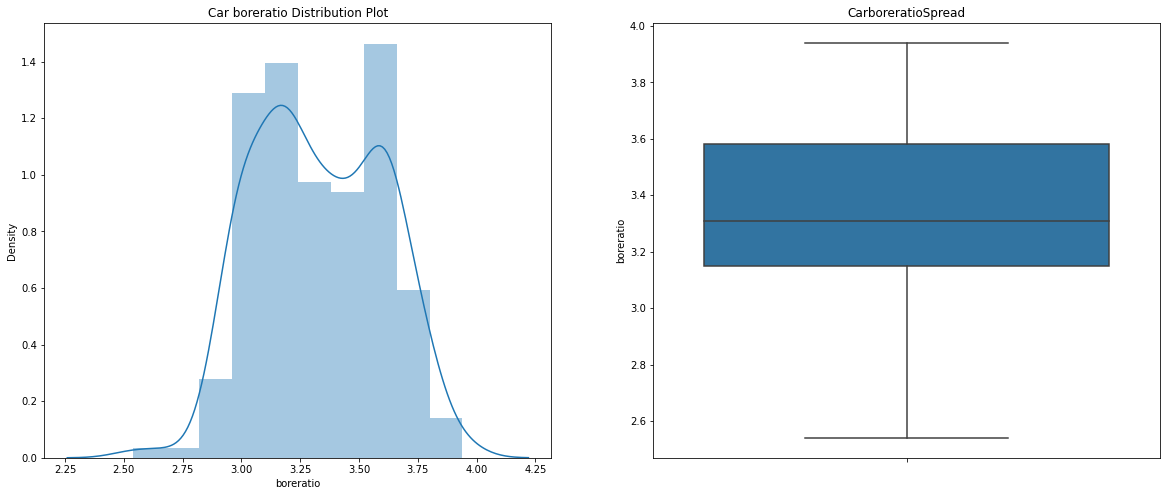

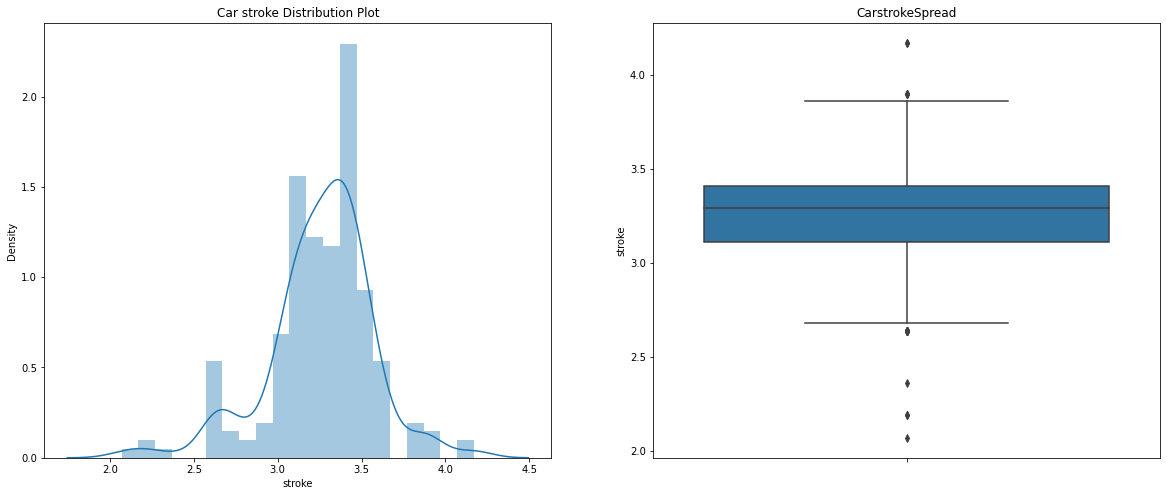

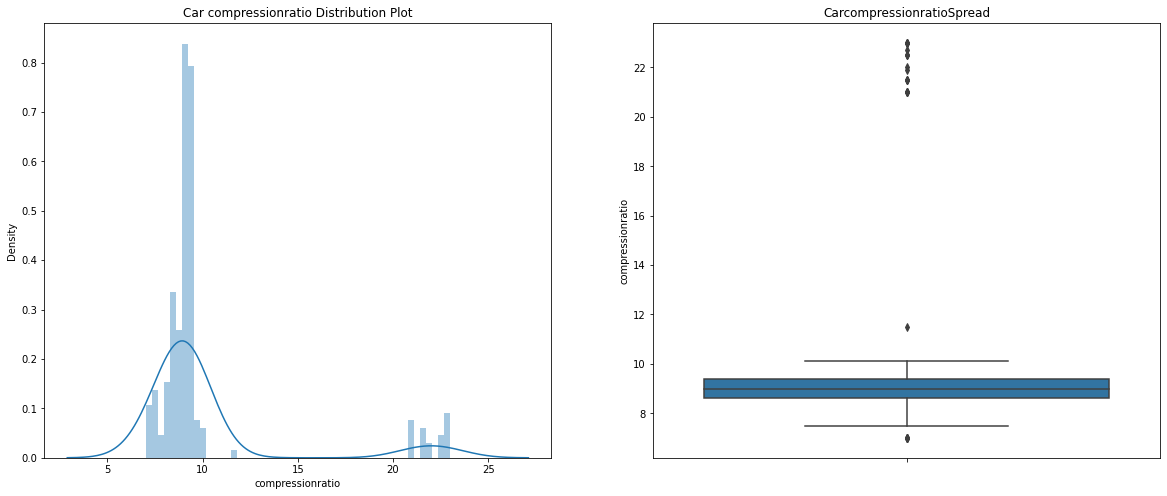

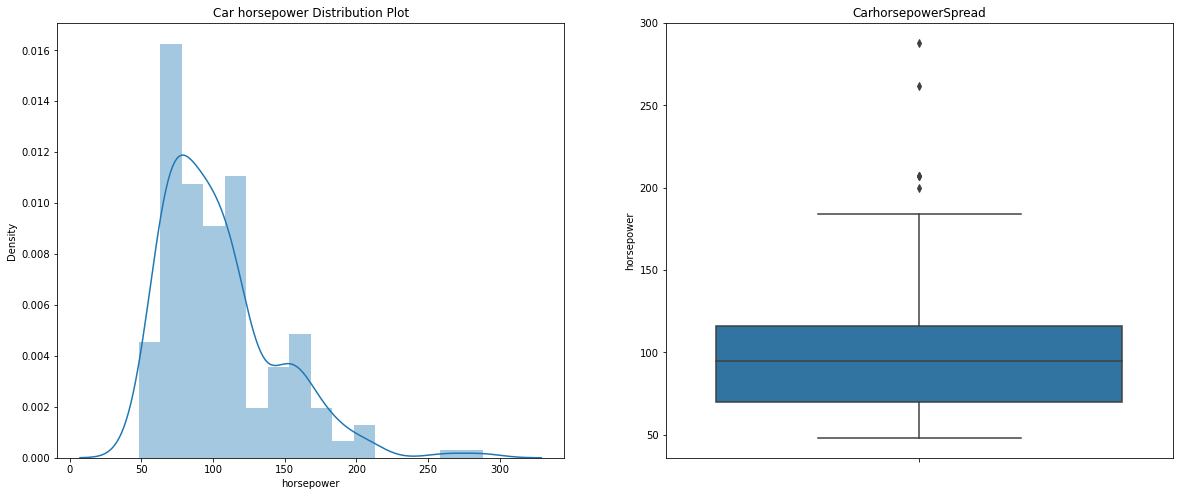

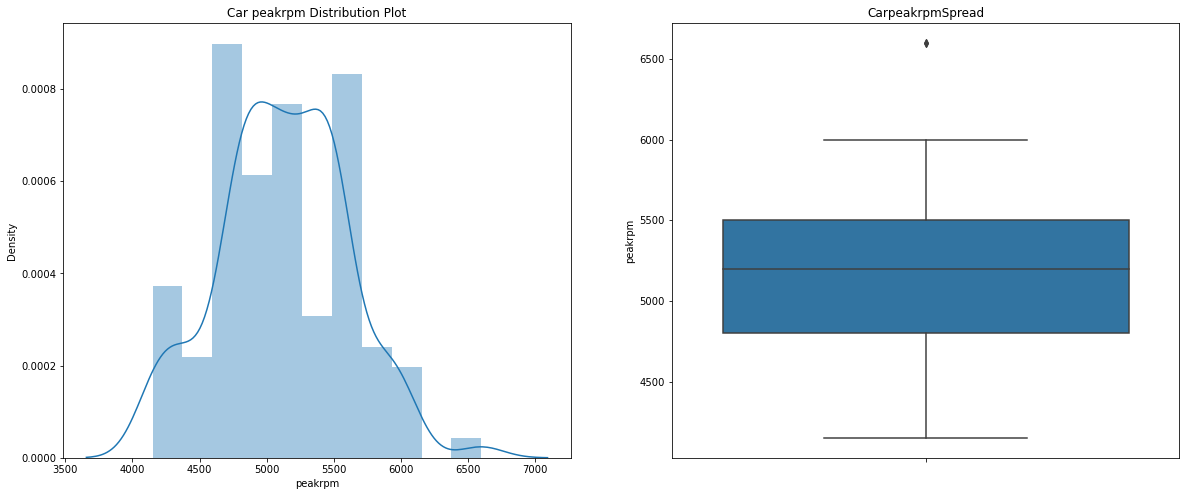

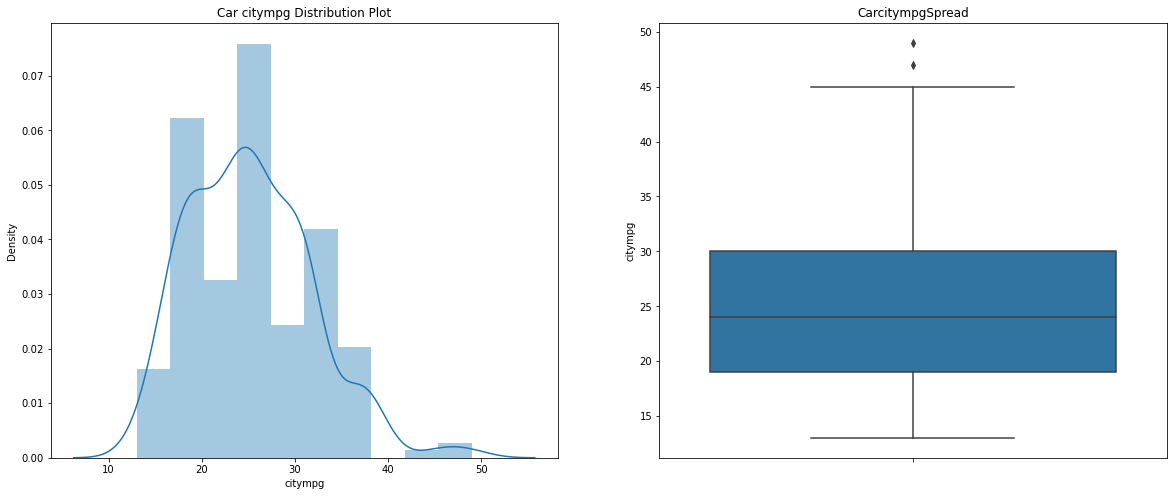

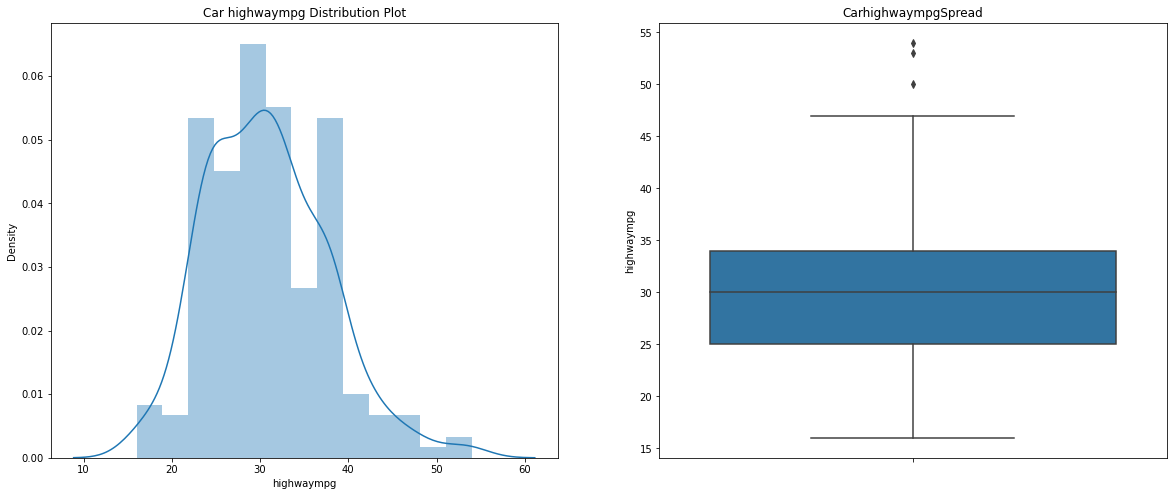

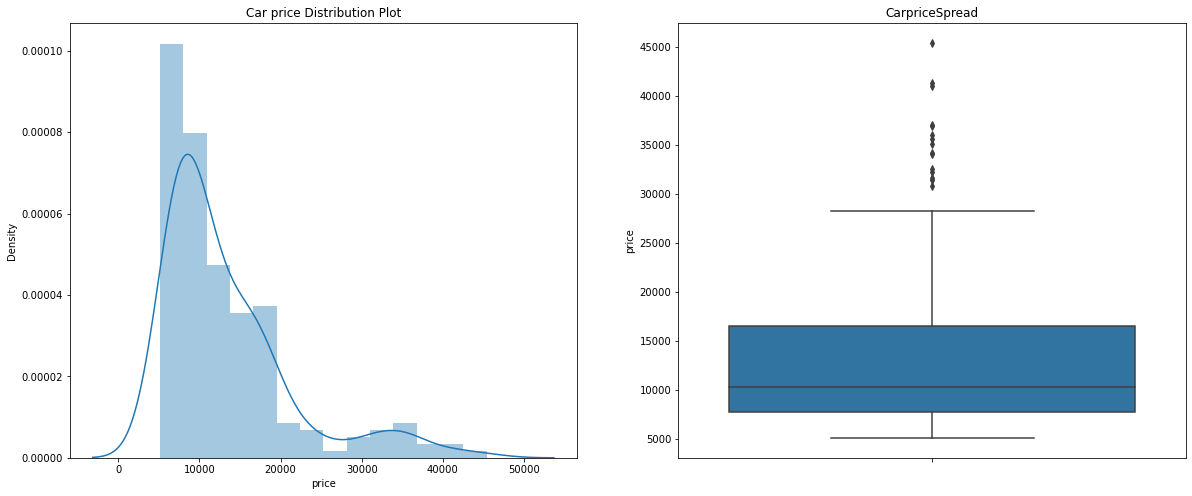

In [17]:
for i in list(df.select_dtypes('number').columns):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.title('Car'+' '+i+' '+'Distribution Plot')
    sns.distplot(df[i])
    plt.subplot(1,2,2)
    plt.title('Car' + i +'Spread')
    sns.boxplot(y=df[i])
    plt.show()

In [18]:
print('Understand the price distribution')
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

Understand the price distribution
count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


# Ploting distribution for target once again

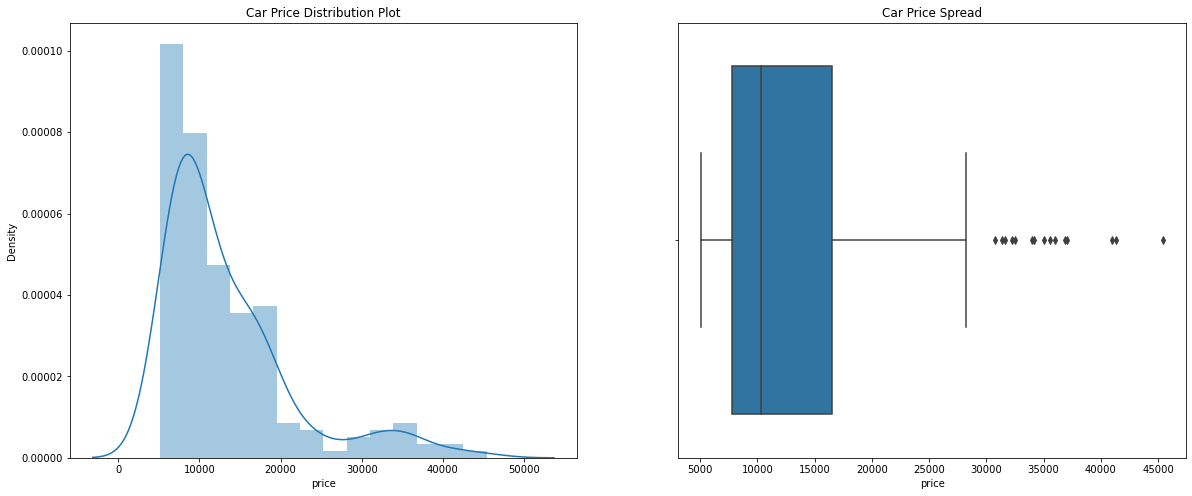

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(x=df.price)

plt.show()

#### Inference :

1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

#  Visualising Categorical Data

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

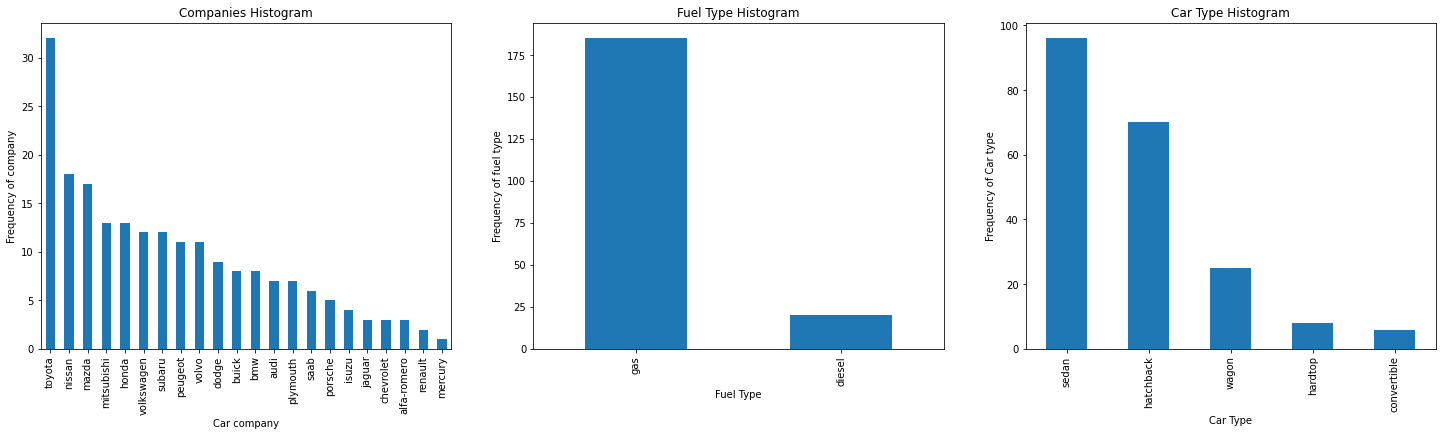

In [20]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

#### Inference :

1. `Toyota` seemed to be favored car company.
2. Number of `gas` fueled cars are more than `diesel`.
3. `sedan` is the top car type prefered.

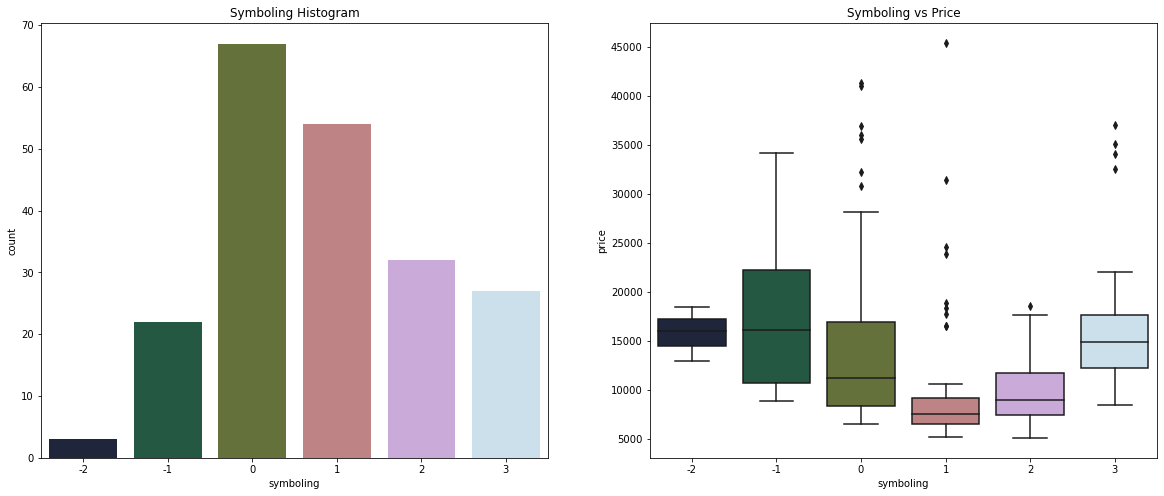

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

#### Inference :

1. It seems that the symboling with `0` and `1` values have high number of rows (i.e. They are most sold.)
2. The cars with `-1` symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with `3` value has the price range similar to `-2` value. There is a dip in price at symboling `1`.

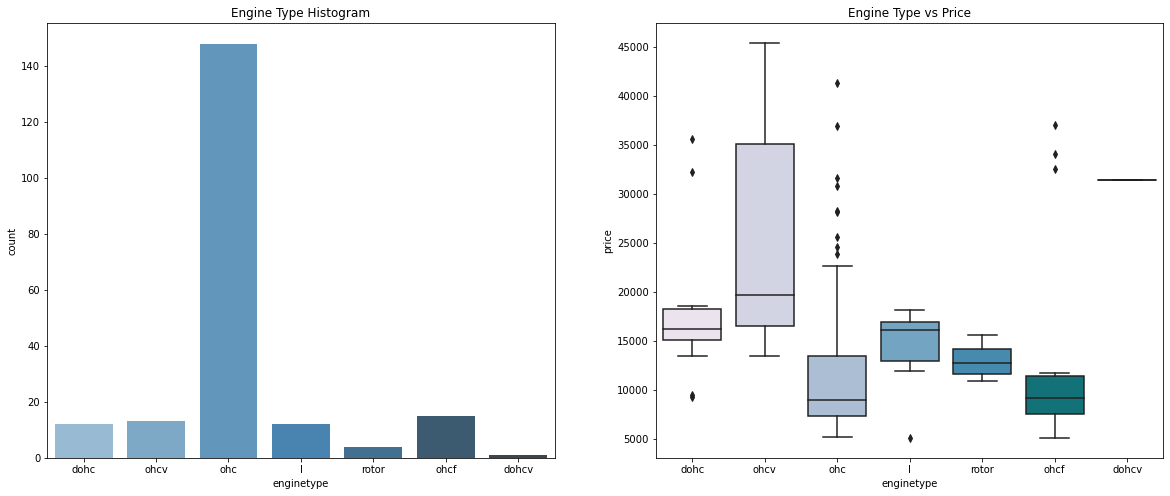

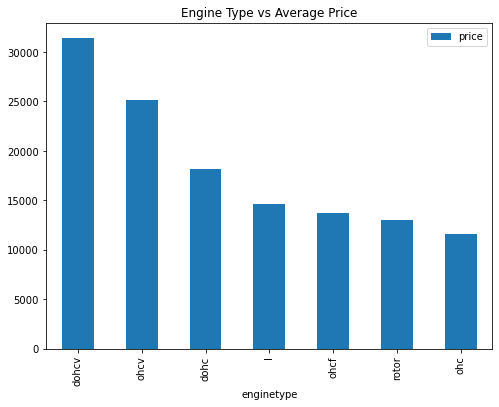

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

pl= pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
pl.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

#### Inference :

1. `ohc` Engine type seems to be most favored type.
2. `ohcv` has the highest price range (While `dohcv` has only one row), `ohc` and `ohcf` have the low price range.

<Figure size 1800x432 with 0 Axes>

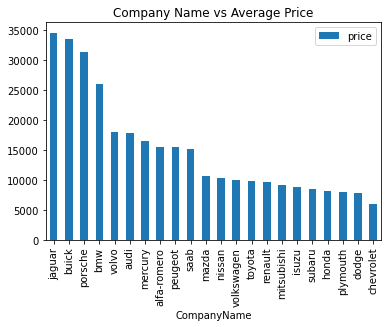

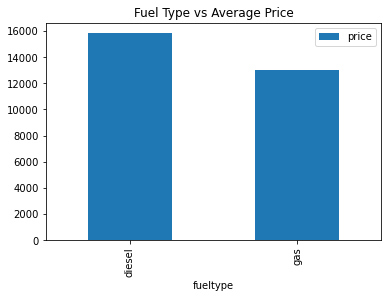

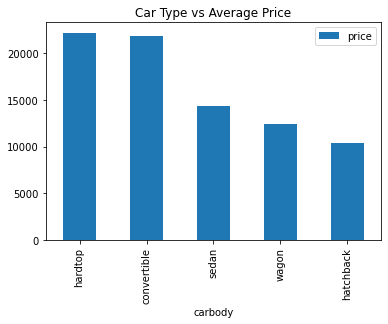

In [23]:
plt.figure(figsize=(25, 6))

pl = pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
pl.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

pl = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
pl.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

pl = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
pl.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Inference :

1. `Jaguar` and `Buick` seem to have highest average price.
2. `diesel` has higher average price than  gas.
3. `hardtop` and `convertible` have higher average price.

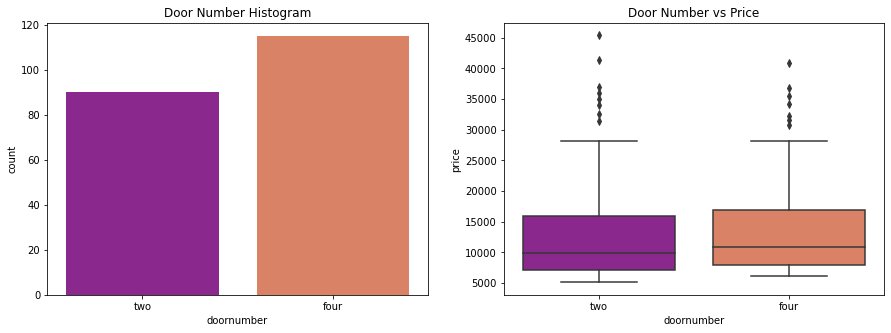

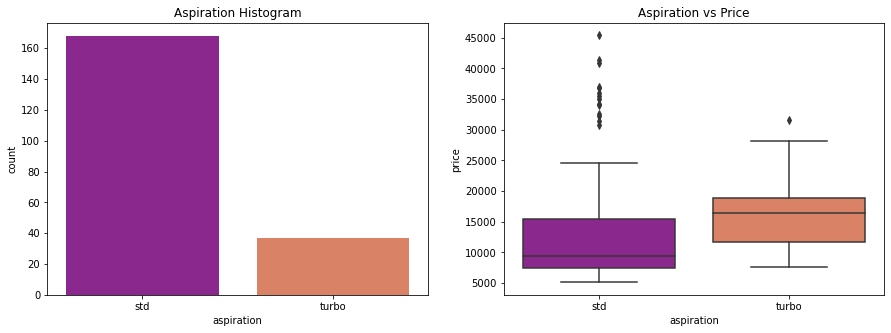

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(df.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("plasma"))

plt.show()

#### Inference :

1. `doornumber` variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with `turbo` have higher price range than the `std`(though it has some high values outside the whiskers.)

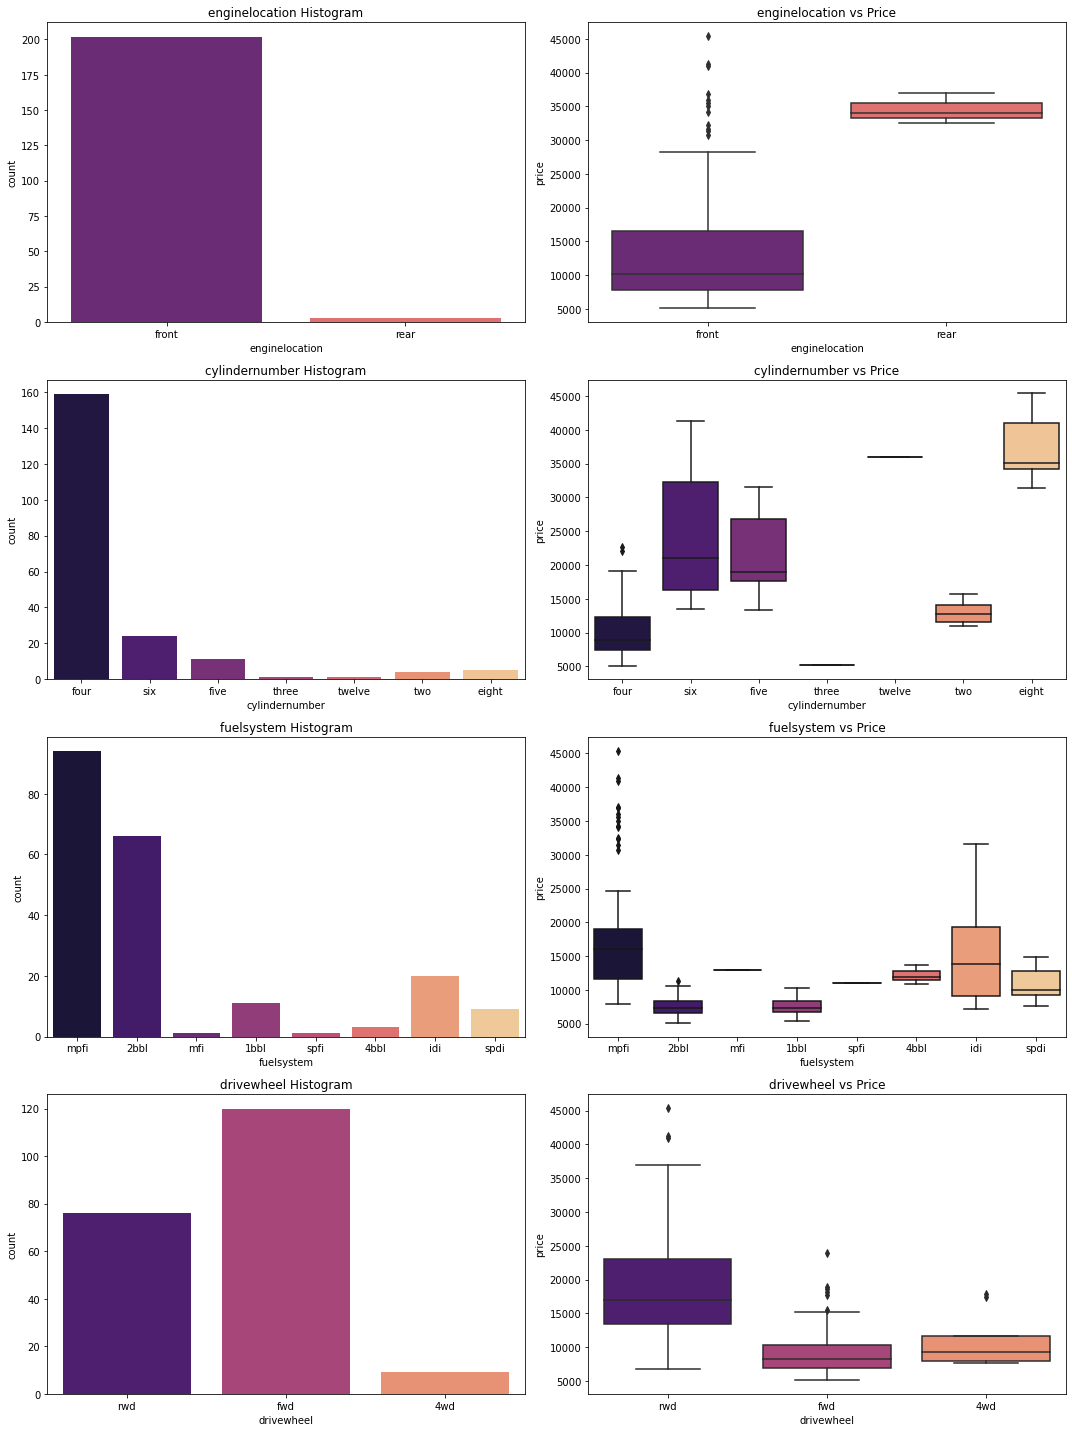

In [25]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

#### Inference :

1. Very few datapoints for `enginelocation` categories to make an inference.
2. Most common number of cylinders are `four`, `six` and `five`. Though `eight` cylinders have the highest price range.
3. `mpfi` and `2bbl` are most common type of fuel systems. `mpfi` and `idi` having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer `rwd` drivewheel.

#### Visualising numerical data

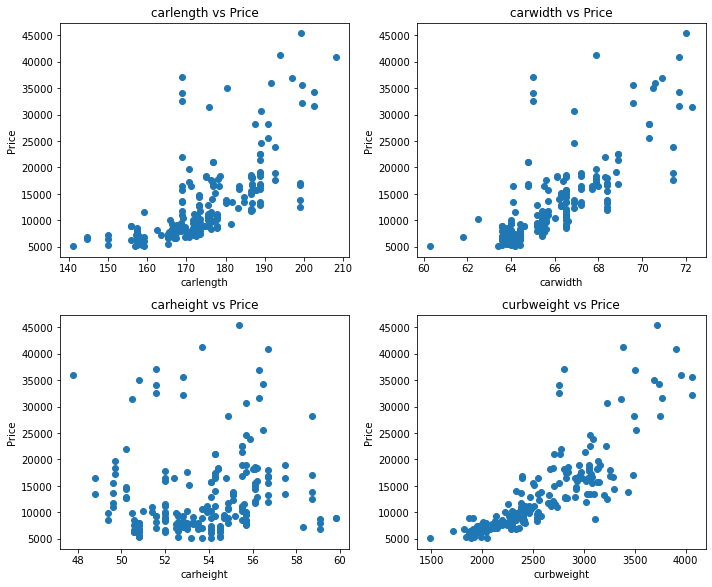

In [26]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

#### Inference :

1. `carwidth`, `carlength` and `curbweight` seems to have a poitive correlation with `price`. 
2. `carheight` doesn't show any significant trend with price.

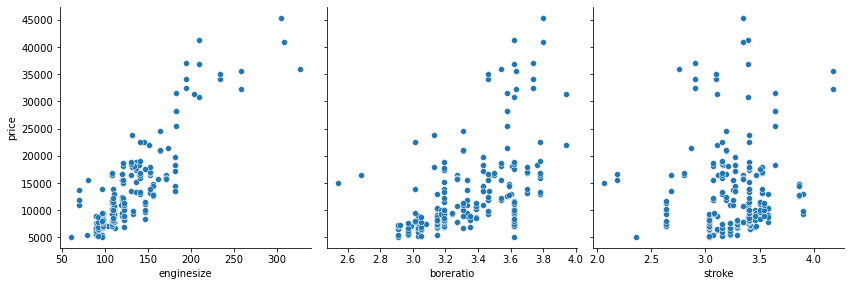

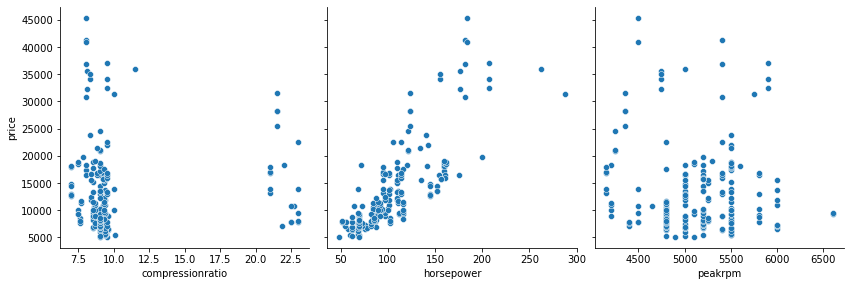

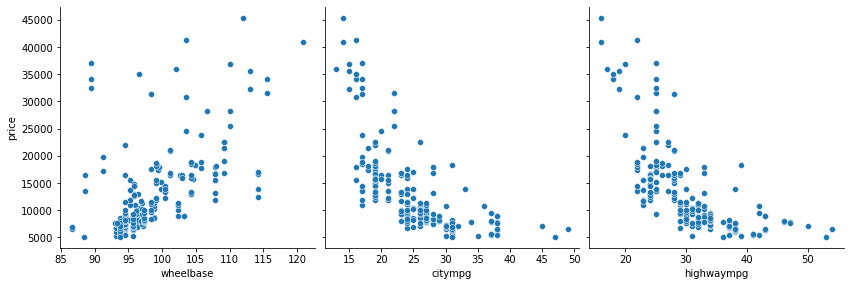

In [27]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

#### Inference :

1. `enginesize`, `boreratio`, `horsepower`, `wheelbase` - seem to have a significant positive correlation with price.
2. `citympg`, `highwaympg` - seem to have a significant negative correlation with price.

### Creating new features

In [28]:
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

# Binning the Car Companies based on avg prices of each Company.

In [29]:
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


### Bivariate Analysis

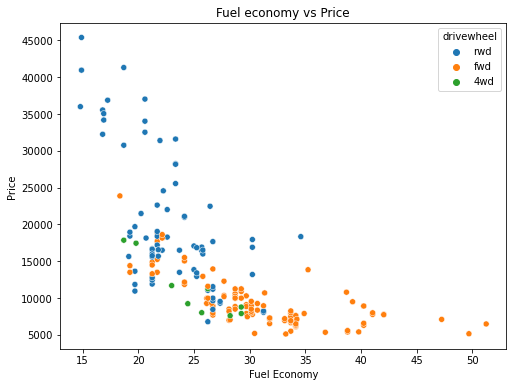

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['fueleconomy'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.show()
plt.tight_layout()

#### Inference :

1. `fueleconomy` has an obvios `negative correlation` with price and is significant.

<Figure size 1800x432 with 0 Axes>

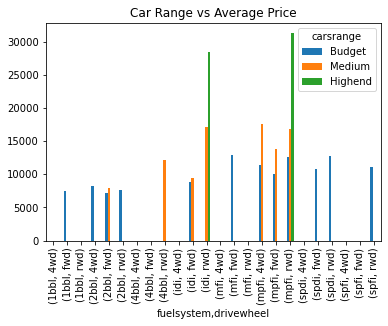

In [31]:
plt.figure(figsize=(25, 6))
pl = pd.DataFrame(df.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
pl.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

#### Inference :

1. High ranged cars prefer `rwd` drivewheel with `idi` or `mpfi` fuelsystem.

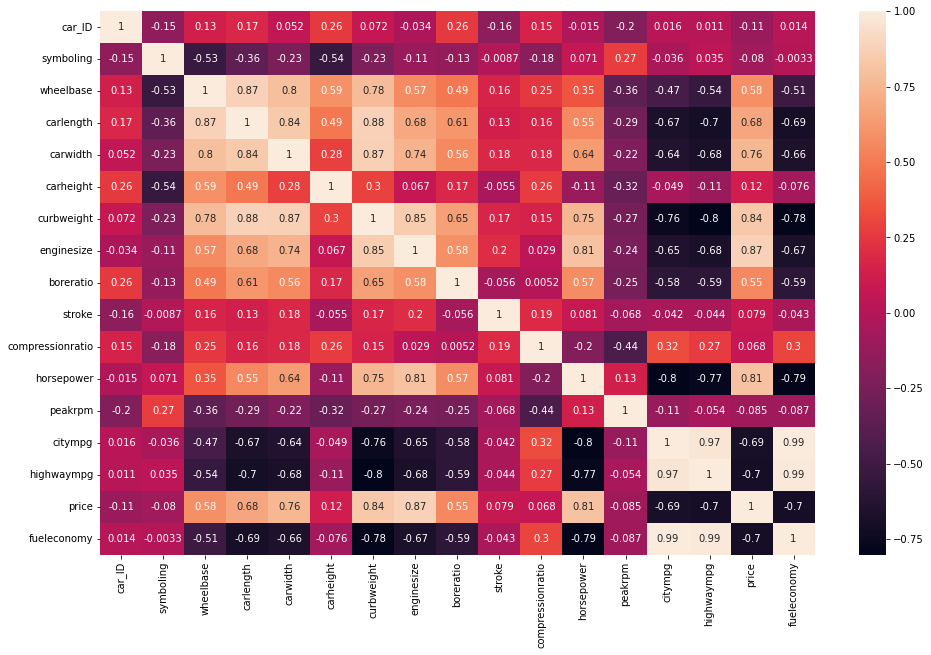

In [32]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

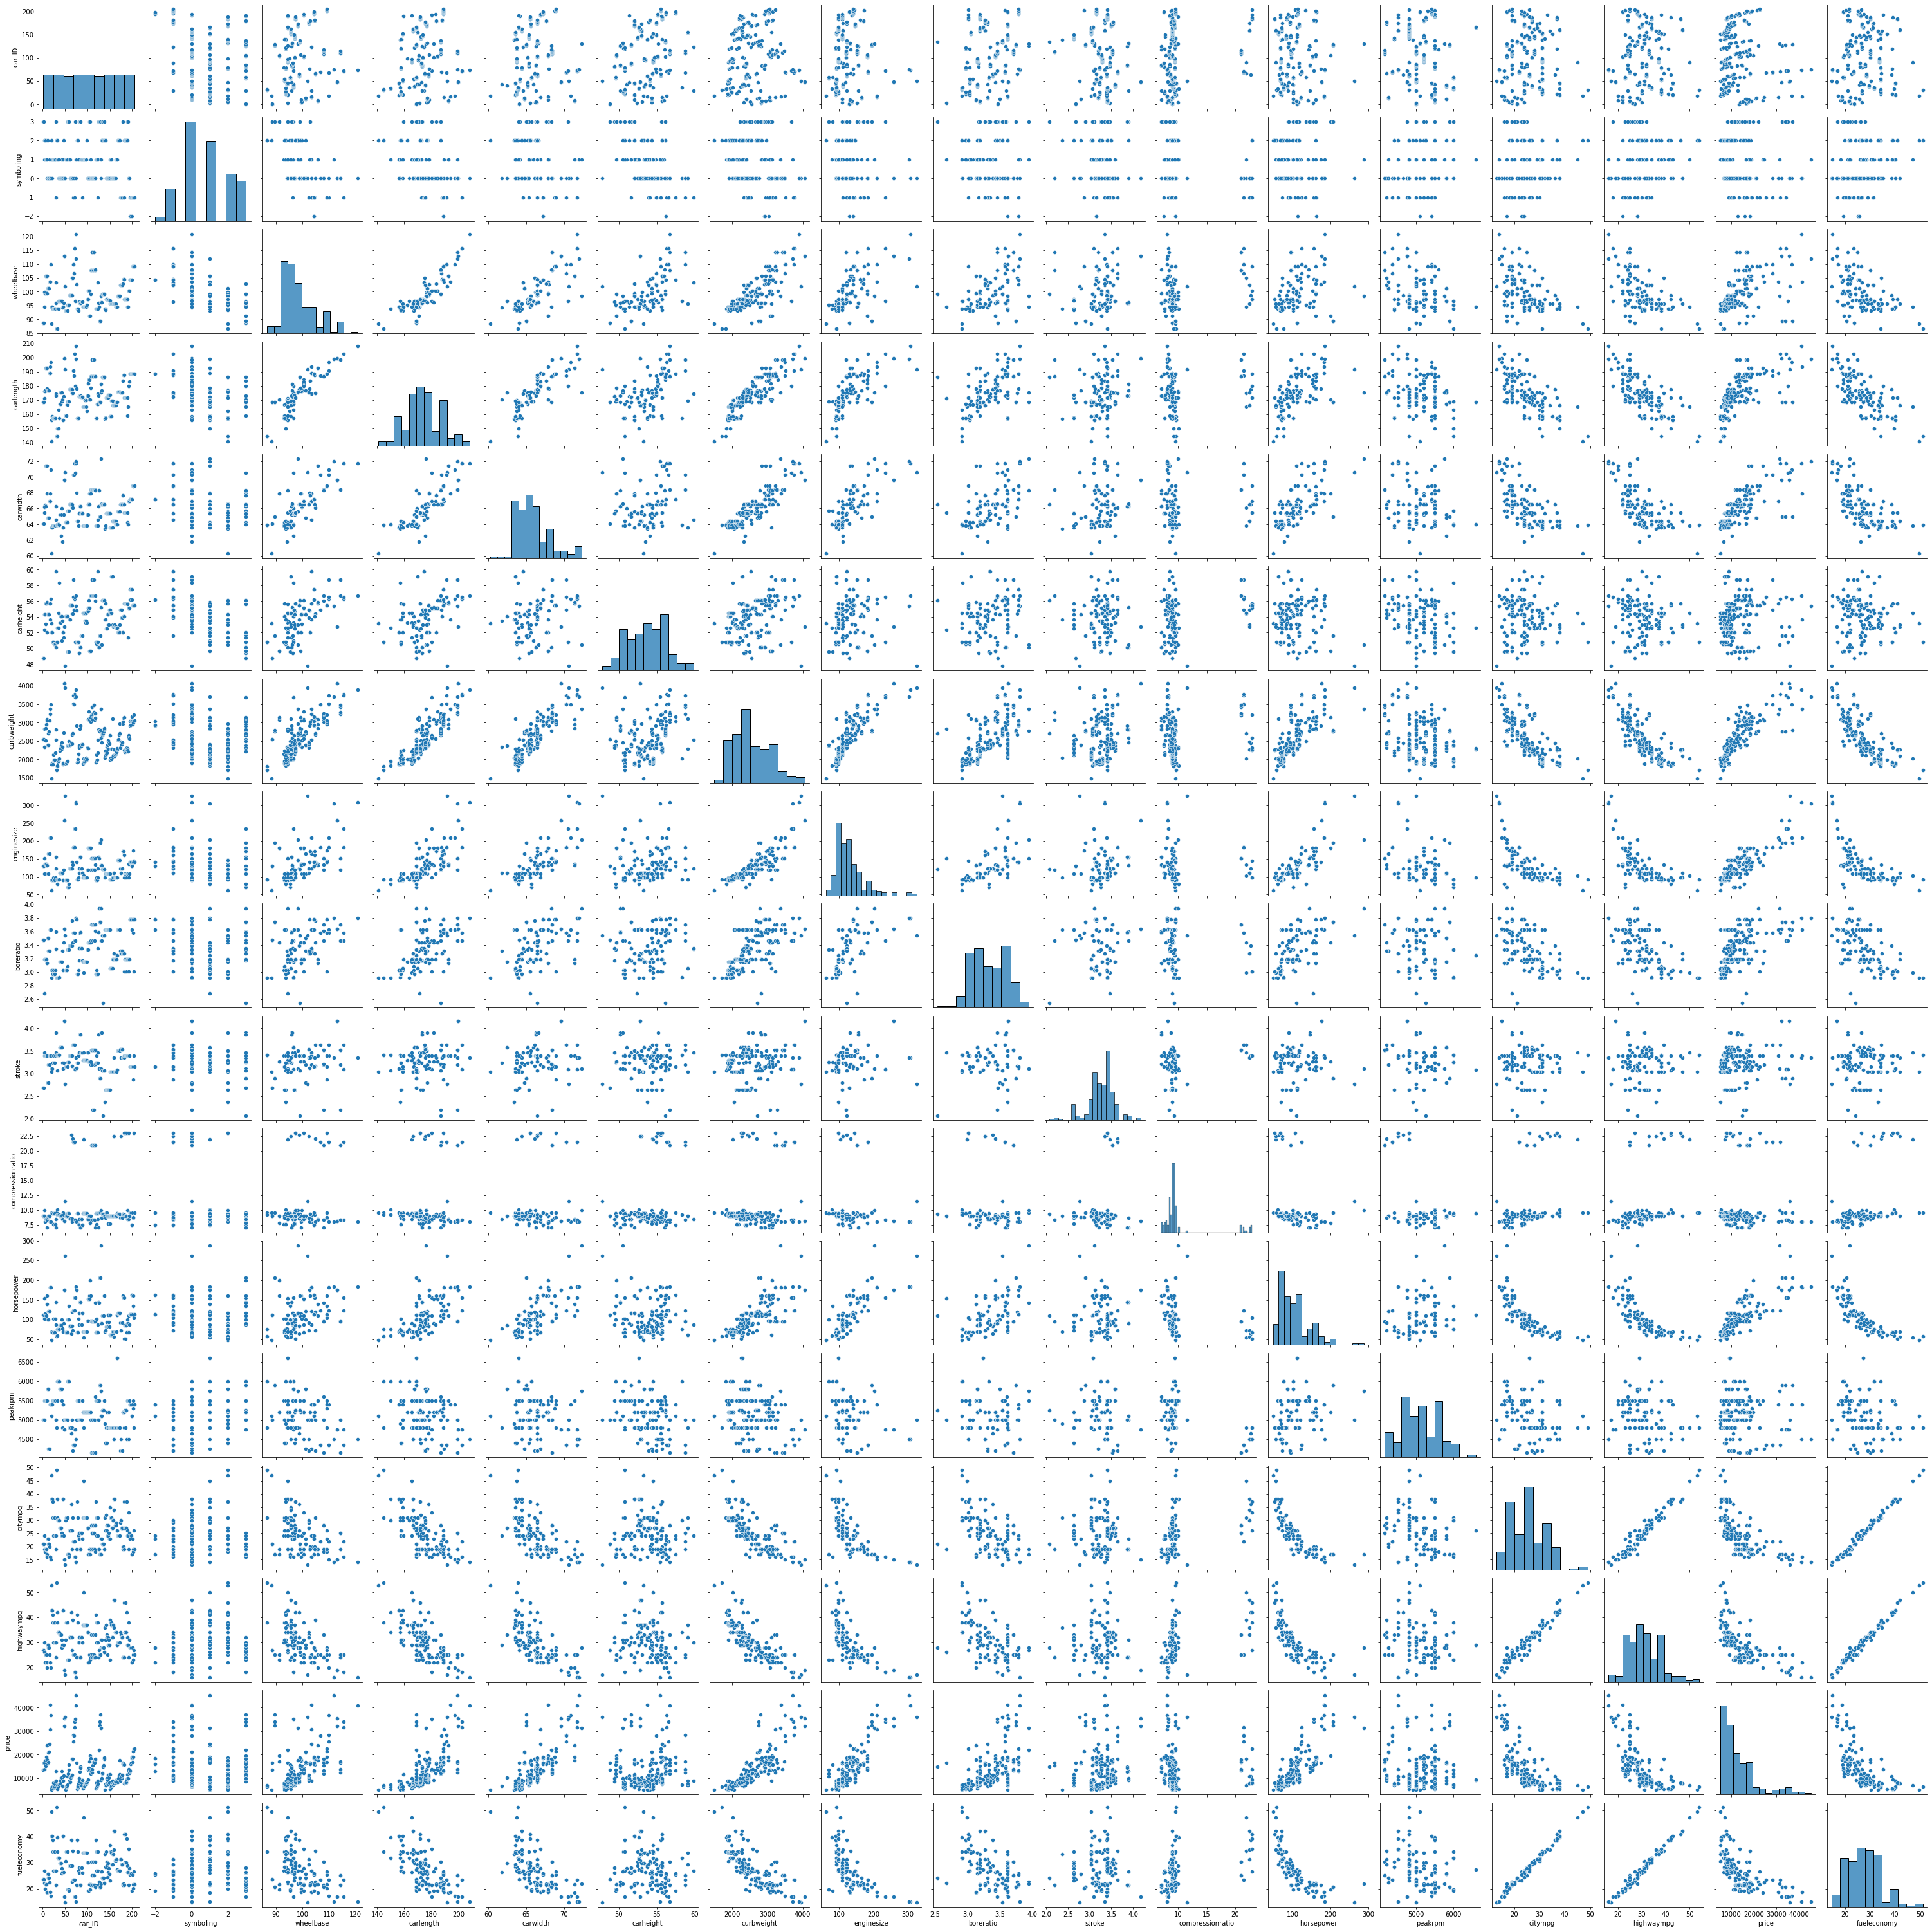

In [33]:
sns.pairplot(df)
plt.show()

# Transformation:

In [32]:
df_num = df.select_dtypes('number')

In [33]:
df_num.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495,23.70
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,23.70
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,22.15
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950,26.70
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450,19.80


In [34]:
df_num.drop(['car_ID','price'],axis = 1,inplace=True)

In [35]:
y = df.price

In [36]:
pt = PowerTransformer()

In [37]:
df_num_trans = pd.DataFrame(pt.fit_transform(df_num),columns=df_num.columns)

### Dummy Variables

In [38]:
for cat_name in df.select_dtypes('object').columns:
    print(cat_name+' '+' '+str(df[cat_name].nunique()))

CompanyName  22
fueltype  2
aspiration  2
doornumber  2
carbody  5
drivewheel  3
enginelocation  2
enginetype  7
cylindernumber  7
fuelsystem  8


In [39]:
df_cat = df.select_dtypes(np.object)

In [40]:
df_cat['carsrange'] = df.carsrange

In [41]:
df_cat.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carsrange
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Medium
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,Medium


# get-dummies:

In [42]:
df_cat = pd.get_dummies(data = df_cat,columns=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',],drop_first=True)

In [43]:
for i in df_cat[['CompanyName','enginetype','cylindernumber','fuelsystem']].columns:
    x = df_cat[i].value_counts()
    if len(x) == len(set(x)):
        df_cat[i] = df_cat[i].map(x) 

In [44]:
df_cat['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [45]:
replace = {'two':1,'three':2,'four':3,'five':4,'six':5,'eight':6,'twelve':7}

In [46]:
df_cat['cylindernumber'] = df_cat['cylindernumber'].map(replace)

In [47]:
df_cat['enginetype'].value_counts(normalize = True)

ohc      0.721951
ohcf     0.073171
ohcv     0.063415
dohc     0.058537
l        0.058537
rotor    0.019512
dohcv    0.004878
Name: enginetype, dtype: float64

In [48]:
df_cat['enginetype'] = df_cat['enginetype'].apply(lambda x: 1 if x == 'ohc' else 0).astype(int)

In [49]:
df_cat['fuelsystem'].value_counts(normalize = True)

mpfi    0.458537
2bbl    0.321951
idi     0.097561
1bbl    0.053659
spdi    0.043902
4bbl    0.014634
mfi     0.004878
spfi    0.004878
Name: fuelsystem, dtype: float64

In [50]:
df_cat['fuelsystem'] = df_cat['fuelsystem'].apply(lambda x: 'mpfi' if x =='mpfi' else '2bbl' if x=='2bbl' else 'others' )

In [51]:
df_cat['CompanyName'].value_counts(normalize = True)

toyota         0.156098
nissan         0.087805
mazda          0.082927
mitsubishi     0.063415
honda          0.063415
volkswagen     0.058537
subaru         0.058537
peugeot        0.053659
volvo          0.053659
dodge          0.043902
buick          0.039024
bmw            0.039024
audi           0.034146
plymouth       0.034146
saab           0.029268
porsche        0.024390
isuzu          0.019512
jaguar         0.014634
chevrolet      0.014634
alfa-romero    0.014634
renault        0.009756
mercury        0.004878
Name: CompanyName, dtype: float64

In [52]:
LB = LabelEncoder()

In [53]:
df_cat['CompanyName'] = LB.fit_transform(df_cat['CompanyName'])

In [54]:
df_cat.select_dtypes('object')

,fuelsystem
0,mpfi
1,mpfi
2,mpfi
3,mpfi
4,mpfi
...,...
200,mpfi
201,mpfi
202,mpfi
203,others


In [55]:
df_cat['carsrange'].value_counts()

Budget     95
Medium     86
Highend    24
Name: carsrange, dtype: int64

In [56]:
df_cat = pd.get_dummies(data=df_cat,columns=['carsrange'],drop_first=True)

In [57]:
df_cat = pd.get_dummies(data=df_cat,columns=['fuelsystem'],drop_first=True)

In [58]:
df_cat.dtypes

CompanyName            int32
enginetype             int32
cylindernumber         int64
fueltype_gas           uint8
aspiration_turbo       uint8
doornumber_two         uint8
carbody_hardtop        uint8
carbody_hatchback      uint8
carbody_sedan          uint8
carbody_wagon          uint8
drivewheel_fwd         uint8
drivewheel_rwd         uint8
enginelocation_rear    uint8
carsrange_Medium       uint8
carsrange_Highend      uint8
fuelsystem_mpfi        uint8
fuelsystem_others      uint8
dtype: object

# Train-Test Split and feature scaling

In [61]:
X = pd.concat([df_num_trans,df_cat],axis =1)
y = df['price']

In [63]:
X.head(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,carsrange_Medium,carsrange_Highend,fuelsystem_mpfi,fuelsystem_others
0,1.637336,-2.402418,-0.404369,-0.860326,-2.067534,0.144823,0.380332,0.525135,-1.731037,-0.014205,...,0,0,0,0,1,0,1,0,1,0
1,1.637336,-2.402418,-0.404369,-0.860326,-2.067534,0.144823,0.380332,0.525135,-1.731037,-0.014205,...,0,0,0,0,1,0,1,0,1,0


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=10)

Train data shape:

In [65]:
X_train.shape,y_train.shape

((143, 32), (143,))

Test data shape

In [66]:
X_test.shape,y_test.shape

((62, 32), (62,))

# Model Building

Model : 1
statsmodel

In [74]:
X_train_sm = sm.add_constant(X_train)
MLR_model = sm.OLS(y_train,X_train_sm).fit()

In [75]:
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     55.73
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           3.19e-54
Time:                        08:10:35   Log-Likelihood:                -1283.3
No. Observations:                 143   AIC:                             2633.
Df Residuals:                     110   BIC:                             2730.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9462.1877   3922.255      2.412      0.018    1689.199    1.72e+04
symboling            -181.4678    329.448     -0.551      0.583    -834.357     471.421
wheelbase             226.4232    594.167      0.381      0.704    -951.077    1403.924
carlength             -89.7088    762.537     -0.118      0.907   -1600.878    1421.461
carwidth              422.5345    553.642      0.763      0.447    -674.655    1519.724
carheight             116.6104    394.495      0.296      0.768    -665.185     898.406
curbweight           3093.7050   1072.031      2.886      0.005     969.192    5218.218
enginesize          -2968.7679   1088.654     -2.727      0.007   -5126.225    -811.310
boreratio            1422.0859    478.866      2.970      0.004     473.086    2371.085
stroke               -316.0864    309.171     -1.022      0.309    -928.790     296.617
compressionratio      189.8906    568.263      0.334      0.739    -936.272    1316.054
horsepower           2650.6686   1100.723      2.408      0.018     469.293    4832.044
peakrpm               313.8436    354.964      0.884      0.379    -389.612    1017.299
citympg              1.021e+05      2e+04      5.093      0.000    6.23e+04    1.42e+05
highwaympg           8.835e+04   1.73e+04      5.101      0.000     5.4e+04    1.23e+05
fueleconomy         -1.891e+05   3.71e+04     -5.097      0.000   -2.63e+05   -1.16e+05
CompanyName          -101.6601     43.788     -2.322      0.022    -188.437     -14.883
enginetype           1585.1637    767.854      2.064      0.041      63.458    3106.869
cylindernumber       2516.2549    776.978      3.239      0.002     976.467    4056.043
fueltype_gas        -3326.6116   2338.307     -1.423      0.158   -7960.588    1307.364
aspiration_turbo     -831.2727   1103.674     -0.753      0.453   -3018.495    1355.950
doornumber_two        220.0267    681.691      0.323      0.747   -1130.925    1570.978
carbody_hardtop     -2283.0468   1679.011     -1.360      0.177   -5610.453    1044.359
carbody_hatchback   -3061.4820   1428.894     -2.143      0.034   -5893.215    -229.749
carbody_sedan       -3705.5081   1530.721     -2.421      0.017   -6739.038    -671.979
carbody_wagon       -4395.9589   1703.933     -2.580      0.011   -7772.755   -1019.163
drivewheel_fwd       1195.0345   1158.288      1.032      0.304   -1100.420    3490.489
drivewheel_rwd        177.1833   1176.225      0.151      0.881   -2153.819    2508.186
enginelocation_rear  9114.2632   2565.678      3.552      0.001    4029.691    1.42e+04
carsrange_Medium     1008.0854    721.025      1.398      0.165    -420.817    2436.988
carsrange_Highend    8625.3139   1403.601      6.145      0.000    5843.706    1.14e+04
fuelsystem_mpfi      -235.5238    781.918     -0.301      0.764   -1785.103    1314.055
fue

model 2:Linear Regresshion

In [71]:
lr = LinearRegression()

In [72]:
lr.fit(X_train,y_train)

LinearRegression()

In [73]:
lr.score(X_train,y_train)

0.9419018564334053

# Feature selection:

# Backward Feature Selection method:

In [76]:
BS_model = SequentialFeatureSelector(estimator=lr,k_features='best',scoring='neg_mean_squared_error',forward=False,verbose=2,cv = 5,n_jobs=-1)

In [77]:
BS_model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    8.6s finished

[2022-02-01 08:11:08] Features: 31/1 -- score: -7265343.588334027[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.4s finished

[2022-02-01 08:11:08] Features: 30/1 -- score: -6987556.777447963[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished

[2022-02-01 08:11:09] Features: 29/1 -- score: -6643092.058295967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features='best', n_jobs=-1,
                          scoring='neg_mean_squared_error', verbose=2)

In [79]:
imp_features = list(BS_model.k_feature_names_)

In [80]:
lr = LinearRegression()
lr_model = lr.fit(X_train[imp_features],y_train)

In [81]:
lr_model.score(X_train[imp_features],y_train)

0.9348627488026755

# RFE Feature selection Model:

In [82]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [83]:
rfe = RFE(estimator=lr,n_features_to_select=13)

In [84]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=13)

In [85]:
rfe_imp = pd.DataFrame({'ranking':rfe.ranking_,'features':X_train.columns})

In [86]:
rfe_imp_feat = list(rfe_imp[rfe_imp['ranking'] ==1]['features'])

In [88]:
lr_model_rfe = LinearRegression()
lr_model_rfe.fit(X_train[rfe_imp_feat],y_train)

LinearRegression()

In [89]:
lr_model_rfe.score(X_train[rfe_imp_feat],y_train)

0.9277287070712048

In [90]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [91]:
checkVIF(X[imp_features])

,Features,VIF
9,fueleconomy,18671.95
7,citympg,5414.70
8,highwaympg,4183.94
10,cylindernumber,39.51
2,curbweight,16.31
13,carbody_sedan,16.04
12,carbody_hatchback,11.59
6,horsepower,11.04
3,enginesize,10.71
14,carbody_wagon,5.70


In [92]:
imp_features.remove('fueleconomy')

In [93]:
checkVIF(X[imp_features])

,Features,VIF
9,cylindernumber,38.47
7,citympg,28.78
8,highwaympg,20.79
2,curbweight,16.21
12,carbody_sedan,15.61
11,carbody_hatchback,11.09
3,enginesize,10.70
6,horsepower,10.06
13,carbody_wagon,5.41
1,carwidth,5.39


In [94]:
imp_features.remove('cylindernumber')

In [95]:
checkVIF(X[imp_features])

,Features,VIF
7,citympg,28.37
8,highwaympg,19.80
2,curbweight,15.73
6,horsepower,9.97
3,enginesize,6.69
1,carwidth,5.29
13,drivewheel_rwd,4.11
17,fuelsystem_mpfi,3.78
11,carbody_sedan,3.28
15,carsrange_Medium,3.01


In [96]:
imp_features.remove('citympg')
checkVIF(X[imp_features])

,Features,VIF
2,curbweight,14.67
6,horsepower,8.61
7,highwaympg,8.28
3,enginesize,6.17
1,carwidth,5.29
12,drivewheel_rwd,4.05
16,fuelsystem_mpfi,3.71
10,carbody_sedan,3.20
14,carsrange_Medium,2.84
15,carsrange_Highend,2.59


In [97]:
X_train_const = sm.add_constant(X_train[imp_features])

In [104]:
mlr_model2 = sm.OLS(y_train,X_train_const).fit()

In [106]:
mlr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     66.36
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           4.25e-54
Time:                        08:29:10   Log-Likelihood:                -1321.9
No. Observations:                 143   AIC:                             2680.
Df Residuals:                     125   BIC:                             2733.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.448e+04   1716.404      8.437      0.000    1.11e+04    1.79e+04
symboling            -232.7877    302.901     -0.769      0.444    -832.266     366.691
carwidth             1299.2808    551.233      2.357      0.020     208.321    2390.240
curbweight           1820.0148    799.838      2.275      0.025     237.037    3402.993
enginesize             34.1515    648.196      0.053      0.958   -1248.709    1317.012
boreratio            -495.2811    334.698     -1.480      0.141   -1157.690     167.127
compressionratio       -5.5226    400.872     -0.014      0.989    -798.897     787.852
horsepower            781.0998    695.988      1.122      0.264    -596.347    2158.546
highwaympg          -1095.2636    716.020     -1.530      0.129   -2512.356     321.829
carbody_hardtop      -797.3233   1962.779     -0.406      0.685   -4681.907    3087.261
carbody_hatchback   -3306.5011   1646.294     -2.008      0.047   -6564.721     -48.281
carbody_sedan       -3282.9793   1657.198     -1.981      0.050   -6562.781      -3.178
carbody_wagon       -4375.2140   1812.540     -2.414      0.017   -7962.456    -787.972
drivewheel_rwd        266.4620    818.161      0.326      0.745   -1352.780    1885.704
enginelocation_rear  5534.7101   2503.483      2.211      0.029     580.007    1.05e+04
carsrange_Medium     1353.2643    640.010      2.114      0.036      86.606    2619.923
carsrange_Highend    1.333e+04   1130.437     11.790      0.000    1.11e+04    1.56e+04
fuelsystem_mpfi      -313.2953    727.664     -0.431      0.668   -1753.433    1126.842
==============================================================================
Omnibus:                       36.434   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.986
Skew:                           0.976   Prob(JB):                     1.94e-22
Kurtosis:                       6.601   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Measuring the Errors:

In [115]:
y_pred_train = mlr_model2.predict(X_train_const)
y_pred_test = mlr_model2.predict(sm.add_constant(X_test[imp_features]))

In [112]:
print('RMSE for Train Data:',np.sqrt(mean_squared_error(y_train,y_pred_train)))

RMSE for Train Data: 2502.7955902608765


In [116]:
print('RMSE for Test Data:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

RMSE for Test Data: 2150.250063224298


# Regularization techniques:

# Lasso model

In [118]:
LS_model = Lasso(alpha=1.0)
LS_model.fit(X_train,y_train)

Lasso()

In [119]:
LS_model.score(X_train,y_train)

0.9286628829780748

In [120]:
LS_model.score(X_test,y_test)

0.9042750005749458

# Elastic-Net model

In [122]:
en_model = ElasticNet()
en_model.fit(X_train,y_train)

ElasticNet()

In [123]:
en_model.score(X_train,y_train)

0.8288898623572435

# Ridge model

In [125]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

Ridge()

In [126]:
ridge_model.score(X_train,y_train)

0.9229781754193503

In [127]:
ridge_model.score(X_test,y_test)

0.905225011815268

# performance evaluation between Ridge and Lasso:

In [129]:
y_pred_train = LS_model.predict(X_train)
y_pred_test = LS_model.predict(X_test)

In [131]:
print('Training error for Lasso:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Testing error for Lasso:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

Training error for Lasso: 2116.5944705773
Testing error for Lasso: 2465.070393836331


In [132]:
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)
print('Training error for Ridge:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Testing error for Ridge:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

Training error for Ridge: 2199.311684028146
Testing error for Ridge: 2452.807745900958


# Hyper-parameter Tuning:

In [155]:
parameters = [{'alpha':[0.9,0.8,0.1,1,0.2,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]}]

In [156]:
grid_lasso_model = GridSearchCV(estimator=Lasso(),param_grid=parameters,cv=5,n_jobs=-1)

In [157]:
grid_lasso_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid=[{'alpha': [0.9, 0.8, 0.1, 1, 0.2, 1.2, 1.3, 1.4, 1.5,
                                    1.6, 1.7, 1.8, 1.9]}])

In [158]:
grid_lasso_model.score(X_train,y_train)

0.9282544703973966

In [159]:
grid_lasso_model.score(X_test,y_test)

0.9045001742499184

In [154]:
grid_lasso_model.best_params_

{'alpha': 1.7}

# SGDRegressor:

In [161]:
Sgd_model = SGDRegressor()
Sgd_model.fit(X_train,y_train)

SGDRegressor()

In [162]:
Sgd_model.score(X_train,y_train)

0.8640134725696532

# Non parametric models:

In [183]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [164]:
rf_model = RandomForestRegressor()

In [165]:
rf_model.fit(X_train[imp_features],y_train)

RandomForestRegressor()

In [166]:
rf_model.score(X_train[imp_features],y_train)

0.9894944237183326

In [167]:
rf_model.score(X_test[imp_features],y_test)

0.90362600542188

In [169]:
y_pred_train = rf_model.predict(X_train[imp_features])
y_pred_test = rf_model.predict(X_test[imp_features])
print('Training error for Random_Forest:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Testing error for Random_Forest:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

Training error for Random_Forest: 812.2501879243962
Testing error for Random_Forest: 2473.4126048193075


# Hyperparameter tuning for Random-Forest:

In [175]:
hyper_parameter = [{'n_estimators':[100,112,120,125],'max_depth':[4,5,6,7],'min_samples_split':[2,3,4,5],'max_features':['sqrt','log'],'n_jobs':[-1],'random_state':[10]}]


In [176]:
grid_model = GridSearchCV(estimator=RandomForestRegressor(),param_grid=hyper_parameter,cv = 5,n_jobs=-1)

In [178]:
grid_model.fit(X_train[imp_features],y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [4, 5, 6, 7],
                          'max_features': ['sqrt', 'log'],
                          'min_samples_split': [2, 3, 4, 5],
                          'n_estimators': [100, 112, 120, 125], 'n_jobs': [-1],
                          'random_state': [10]}])

In [179]:
grid_model.score(X_train[imp_features],y_train)

0.9860224378778215

In [181]:
grid_model.score(X_test[imp_features],y_test)

0.9164137374202708

In [182]:
y_pred_train = grid_model.predict(X_train[imp_features])
y_pred_test = grid_model.predict(X_test[imp_features])
print('Training error for Random_Forest:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Testing error for Random_Forest:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

Training error for Random_Forest: 936.90508439294
Testing error for Random_Forest: 2303.478128466519


In [185]:
knn= KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [186]:
knn.score(X_train,y_train)

0.8966013584619854

# KNN with Important feature:

In [187]:
knn= KNeighborsRegressor()
knn.fit(X_train[imp_features],y_train)

KNeighborsRegressor()

In [189]:
knn.score(X_train[imp_features],y_train)

0.9064252358095457

# Choosing the Simple and yet best model:

In [191]:
LR = LinearRegression(n_jobs=-1)

In [192]:
LR.fit(X_train[imp_features],y_train)

LinearRegression(n_jobs=-1)

In [193]:
LR.score(X_train[imp_features],y_train)

0.9002550305205355

In [194]:
LR.score(X_test[imp_features],y_test)

0.9271642395029767

# Performance evaluation

In [196]:
y_pred_train = LR.predict(X_train[imp_features])
y_pred_test = LR.predict(X_test[imp_features])
print('Training error for Linear Regression:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Testing error for Linear Regression:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

Training error for Linear Regression: 2502.7955902608765
Testing error for Linear Regression: 2150.250063224303


# Model Evaluation:

In [201]:
scores = cross_val_score(estimator = LinearRegression(), 
                            X = X_train[imp_features], 
                            y = y_train, 
                            cv = 5, 
                            scoring = 'neg_mean_squared_error',
                         )

In [207]:
print("The Linear Regression Final model Performance",np.mean(np.sqrt(np.abs(scores))))

The Linear Regression Final model Performance 3012.755081927022
